<a href="https://colab.research.google.com/github/sanaeaba/Recommende_system_coursera/blob/master/NeuFM_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==0.17.5
!pip install -U mxnet-cu101==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 684 kB/s 
     |████████████████████████████████| 11.2 MB 15.6 MB/s 
     |████████████████████████████████| 9.9 MB 41.8 MB/s 
     |████████████████████████████████| 15.7 MB 24.5 MB/s 
     |████████████████████████████████| 61 kB 8.7 MB/s 
     |████████████████████████████████| 930 kB 44.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████████████████████▌| 834.1 MB 1.2 MB/s eta 0:00:11tcmalloc: large alloc 1147494400 bytes == 0x39c98000 @  0x7fcb39530615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 846.0 MB 20 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!pip install fast-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 807 kB/s 


In [ ]:
from d2l import mxnet as d2l
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, merge, Dropout, Dense, BatchNormalization,concatenate,Multiply,Dot
from tensorflow.keras import regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [ ]:
from google.colab import files
data = files.upload()

Saving cousera_For_mlp.csv to cousera_For_mlp (1).csv


In [ ]:
data = pd.read_csv("cousera_For_mlp.csv")
data

,Unnamed: 0,course_id,user_id,rating,Sentiment,course_difficulty
0,0,the-science-of-well-being,By Laura C,2,2,Mixed
1,1,the-science-of-well-being,By Tyson K,2,1,Mixed
2,2,the-science-of-well-being,By DULCEMARIA G S,2,0,Mixed
3,3,the-science-of-well-being,By Jonathan G,3,2,Mixed
4,4,the-science-of-well-being,By Liron S,3,2,Mixed
...,...,...,...,...,...,...
20117,20117,object-oriented-java,By Aman C 1,4,2,Beginner
20118,20118,object-oriented-java,By FPB,4,2,Beginner
20119,20119,object-oriented-java,By Alessandra G,4,0,Beginner
20120,20120,object-oriented-java,By Akash k,4,2,Beginner


In [ ]:
from sklearn.preprocessing import LabelEncoder
course_encoder = LabelEncoder()
user_encoder = LabelEncoder()

data['course_id'] = course_encoder.fit_transform(data.course_id)
data['user_id'] = user_encoder.fit_transform(data.user_id)
data

,Unnamed: 0,course_id,user_id,rating,Sentiment,course_difficulty
0,0,289,8507,2,2,Mixed
1,1,289,15643,2,1,Mixed
2,2,289,3474,2,0,Mixed
3,3,289,7221,3,2,Mixed
4,4,289,8776,3,2,Mixed
...,...,...,...,...,...,...
20117,20117,210,1060,4,2,Beginner
20118,20118,210,4906,4,2,Beginner
20119,20119,210,838,4,0,Beginner
20120,20120,210,695,4,2,Beginner


In [ ]:
#categorical data
categorical_cols = ['Sentiment','course_difficulty'] 
#import pandas as pd
data = pd.get_dummies(data, columns = categorical_cols)
data

,Unnamed: 0,course_id,user_id,rating,Sentiment_0,Sentiment_1,Sentiment_2,course_difficulty_Advanced,course_difficulty_Beginner,course_difficulty_Intermediate,course_difficulty_Mixed
0,0,289,8507,2,0,0,1,0,0,0,1
1,1,289,15643,2,0,1,0,0,0,0,1
2,2,289,3474,2,1,0,0,0,0,0,1
3,3,289,7221,3,0,0,1,0,0,0,1
4,4,289,8776,3,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20117,20117,210,1060,4,0,0,1,0,1,0,0
20118,20118,210,4906,4,0,0,1,0,1,0,0
20119,20119,210,838,4,1,0,0,0,1,0,0
20120,20120,210,695,4,0,0,1,0,1,0,0


In [ ]:
data['user_metadata'] = data[data.columns[4:7]].apply( lambda x: ''.join(x.dropna().astype(str)), axis=1)
data['course_metadata'] = data[data.columns[7:11]].apply( lambda x: ''.join(x.dropna().astype(str)), axis=1)
data.drop(data.iloc[:, 4:11], inplace = True, axis = 1)
data= data.drop(columns=['Unnamed: 0'])

In [ ]:
data['course_metadata'] = course_encoder.fit_transform(data.course_metadata)
data['user_metadata'] = user_encoder.fit_transform(data.user_metadata)
data

,course_id,user_id,rating,user_metadata,course_metadata
0,289,8507,2,0,0
1,289,15643,2,1,0
2,289,3474,2,2,0
3,289,7221,3,0,0
4,289,8776,3,0,0
...,...,...,...,...,...
20117,210,1060,4,0,2
20118,210,4906,4,0,2
20119,210,838,4,2,2
20120,210,695,4,0,2


In [ ]:
num_users = len(data.user_id.unique())
num_courses = len(data.course_id.unique())
num_course_metadata = data.course_metadata.max()
num_user_metadata = data.user_metadata.max()
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data, target = 'rating', train_size=0.7, valid_size=0.1, test_size=0.2)

In [ ]:
latent_dim = 24

# Define inputs
course_input = Input(shape=[1],name='course-input')
user_input = Input(shape=[1], name='user-input')
course_metadata_input = Input(1,name='course-metadata-input')
user_metadata_input = Input(1,name='user-metadata-input')

# MLP Embeddings
course_embedding_mlp = Embedding( num_courses + 1, latent_dim, name='course-embedding-mlp')(course_metadata_input)
course_vec_mlp = Flatten(name='flatten-course-mlp')(course_embedding_mlp)

user_embedding_mlp = Embedding(num_users + 1, latent_dim, name='user-embedding-mlp')(user_metadata_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# MF Embeddings
course_embedding_mf = Embedding(num_courses + 1, latent_dim, name='course-embedding-mf')(course_input)
course_vec_mf = Flatten(name='flatten-course-mf')(course_embedding_mf)

user_embedding_mf = Embedding(num_users + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)

# MLP layers
concat = concatenate([course_vec_mlp, user_vec_mlp])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(150, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(75, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(20, name='pred-mlp', activation='relu')(fc_2_dropout)
#pred_mf = concatenate([course_vec_mf, user_vec_mf])
#pred_mf = Multiply()([course_vec_mf, user_vec_mf])
#pred_mf = Dot(axes=1)([course_vec_mf, user_vec_mf])
pred_mf = course_vec_mf * user_vec_mf
combine_mlp_mf = concatenate([pred_mf, pred_mlp], name='combine-mlp-mf')

# Final prediction
result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

model = Model([user_input, course_input,course_metadata_input, user_metadata_input], result)
#model.compile(loss='mse', optimizer='adam')
#model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='mean_absolute_error')
#model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='mean_squared_error' ,metrics=['accuracy'])
#image= SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 course-metadata-input (InputLa  [(None, 1)]         0           []                               
 yer)                                                                                             
                                                                                                  
 user-metadata-input (InputLaye  [(None, 1)]         0           []                               
 r)                                                                                               
                                                                                                  
 course-embedding-mlp (Embeddin  (None, 1, 24)       7608        ['course-metadata-input[0][0]']  
 g)                                                                                           

In [ ]:
from sklearn.metrics import mean_absolute_error
history = model.fit([X_train.user_id, X_train.course_id, X_train.course_metadata, X_train.user_metadata], y_train, epochs=65, batch_size=100, validation_data=([X_valid.user_id, X_valid.course_id, X_valid.course_metadata, X_valid.user_metadata], y_valid))
y_hat = model.predict([X_test.user_id, X_test.course_id, X_test.course_metadata, X_test.user_metadata])
y_true = y_test

Epoch 1/65
141/141 [==============================] - 4s 16ms/step - loss: 3.6248 - val_loss: 4.5088
Epoch 2/65
141/141 [==============================] - 2s 13ms/step - loss: 2.7996 - val_loss: 4.3869
Epoch 3/65
141/141 [==============================] - 2s 13ms/step - loss: 2.6871 - val_loss: 3.9213
Epoch 4/65
141/141 [==============================] - 2s 13ms/step - loss: 2.5368 - val_loss: 3.0802
Epoch 5/65
141/141 [==============================] - 2s 13ms/step - loss: 2.4695 - val_loss: 2.5231
Epoch 6/65
141/141 [==============================] - 2s 13ms/step - loss: 2.2678 - val_loss: 0.6982
Epoch 7/65
141/141 [==============================] - 2s 13ms/step - loss: 1.1697 - val_loss: 0.7690
Epoch 8/65
141/141 [==============================] - 2s 13ms/step - loss: 0.9076 - val_loss: 0.5682
Epoch 9/65
141/141 [==============================] - 2s 13ms/step - loss: 0.8551 - val_loss: 0.6304
Epoch 10/65
141/141 [==============================] - 2s 13ms/step - loss: 0.8293 - val_lo

In [ ]:
!pip install recmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 13.2 MB 33.2 MB/s 
     |████████████████████████████████| 793 kB 57.7 MB/s 
     |████████████████████████████████| 381 kB 59.2 MB/s 
     |████████████████████████████████| 297 kB 64.9 MB/s 
     |████████████████████████████████| 208 kB 26.4 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 232 kB 54.7 MB/s 
     |████████████████████████████████| 138 kB 59.8 MB/s 
     |████████████████████████████████| 48 kB 6.7 MB/s 
     |████████████████████████████████| 51 kB 9.0 MB/s 
     |████████████████████████████████| 4.0 MB 50.2 MB/s 
     |████████████████████████████████| 131 kB 62.6 MB/s 
     |████████████████████████████████| 428 kB 53.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=c6ab4

In [ ]:
import recmetrics
MAE = mean_absolute_error(y_true, y_hat)
print("MAE: ", MAE)
print("MSE: ", recmetrics.mse(y_true,y_hat))
print("RMSE: ", recmetrics.rmse(y_true,y_hat))

MAE:  0.5926146337852715
MSE:  0.7772447442129039
RMSE:  0.8816148502679069


In [ ]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 8.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.5.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


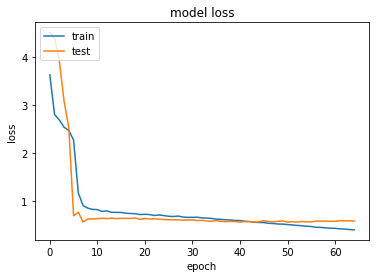

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()